##**Moubani Das**
##**Oasis Infobyte Aug-Sept '24**
##**Project 2, Level 2-Wine Quality Prediction**

Loading necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


Uploading and reading dataset

In [8]:
#Reading the file
df=pd.read_csv('WineQT.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


##EDA

In [9]:
#Shape of dataset
df.shape

(1143, 13)

In [10]:
#Statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
#Desciption of Dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [12]:
#Datatype of Dataset
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


##Data Cleaning

In [13]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [15]:
df.duplicated().sum()

0

##Visual EDA

In [16]:
#Distribution of quality ratings
df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


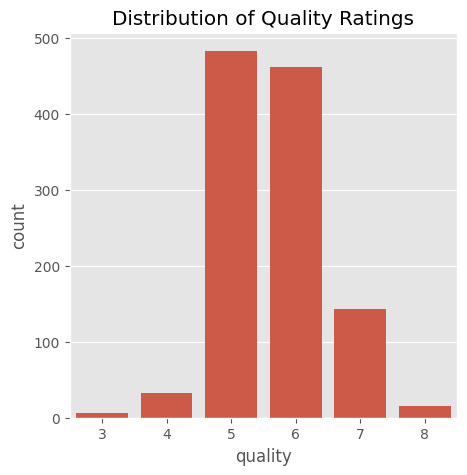

In [23]:
style.use('ggplot')
plt.figure(figsize=(5,5))
sns.countplot(x='quality',data=df)
plt.title('Distribution of Quality Ratings')
plt.show()

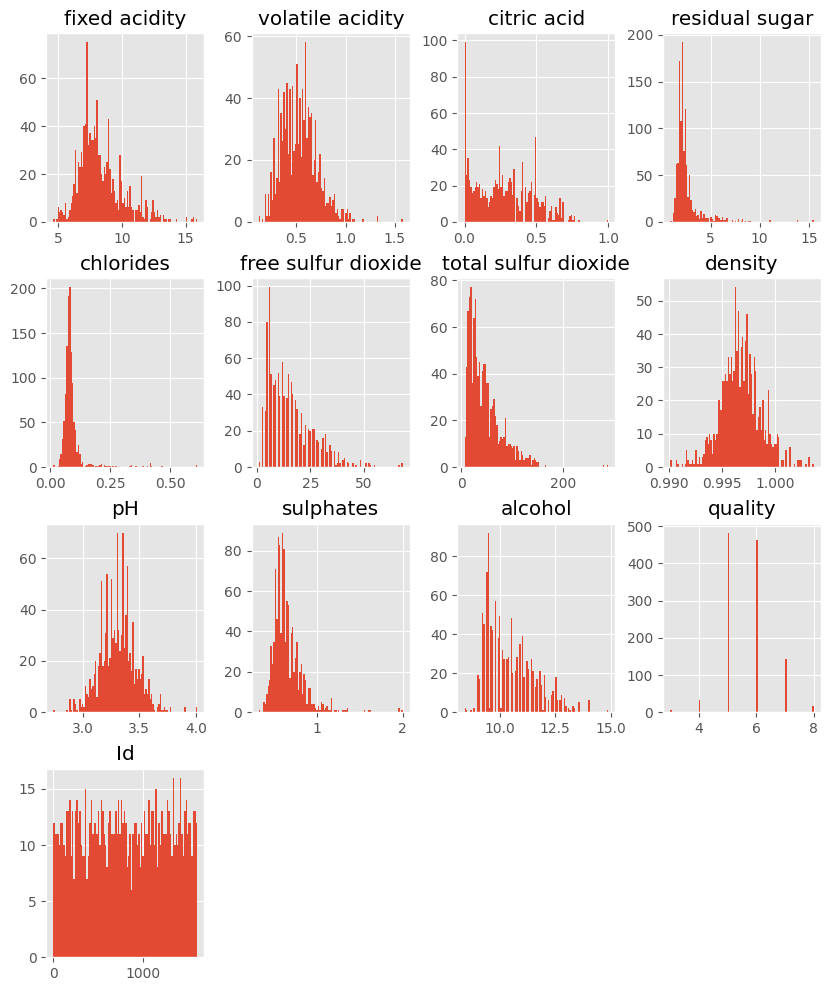

In [25]:
df.hist(bins=100,figsize=(10,12))
plt.show()

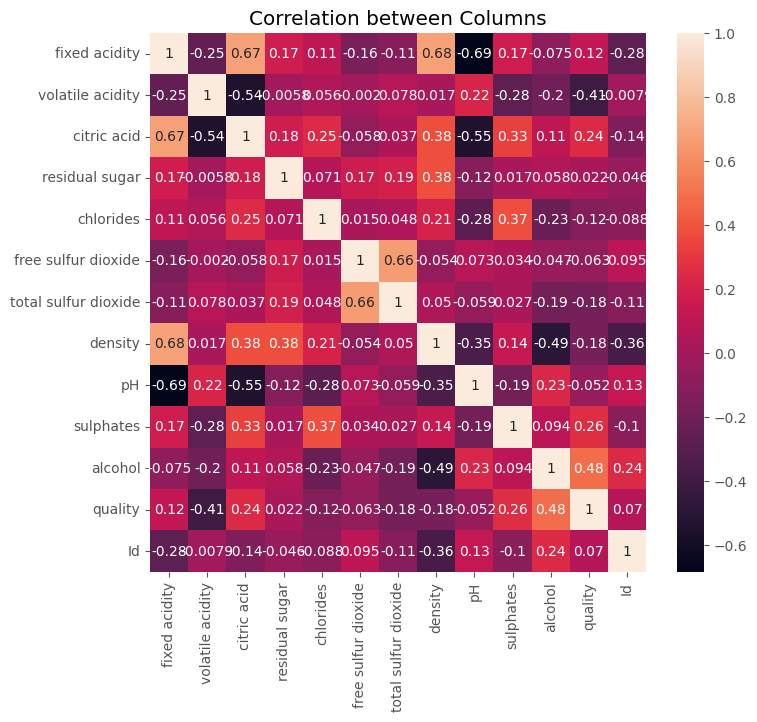

In [29]:
#correaltion between columns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between Columns')
plt.show()

##Classifier Models

In [30]:
#Features and target
x=df.drop(columns=['quality','Id'])
y=df['quality']

In [32]:
#Standardize data
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

#splitting Dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=30)

##Random Forest Classifier

In [34]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.66      0.73      0.69        88
           6       0.65      0.66      0.65        97
           7       0.53      0.59      0.56        29
           8       1.00      0.20      0.33         5

    accuracy                           0.64       229
   macro avg       0.47      0.36      0.37       229
weighted avg       0.62      0.64      0.62       229

[[ 0  0  2  0  0  0]
 [ 0  0  5  3  0  0]
 [ 0  0 64 21  3  0]
 [ 0  0 24 64  9  0]
 [ 0  0  2 10 17  0]
 [ 0  0  0  1  3  1]]


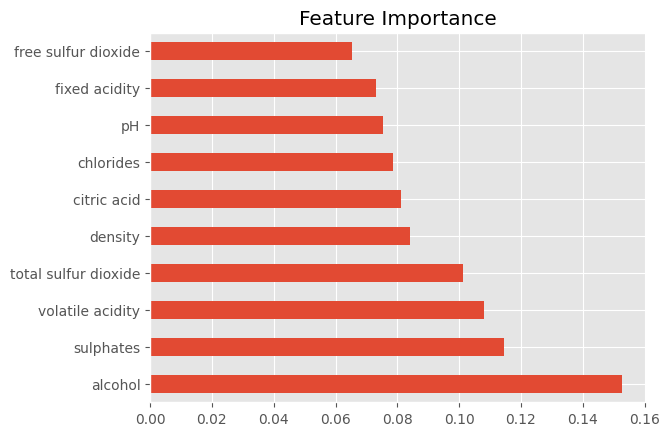

In [36]:
#Visualising Feature Importance
Feature_importance=pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False)
Feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

##Stochastic Gradient Decent Classifier

In [38]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)

sgd_y_pred=sgd.predict(x_test)

print(classification_report(y_test,sgd_y_pred))
print(confusion_matrix(y_test,sgd_y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.49      0.65      0.56        88
           6       0.46      0.39      0.42        97
           7       0.19      0.10      0.13        29
           8       0.12      0.20      0.15         5

    accuracy                           0.43       229
   macro avg       0.21      0.22      0.21       229
weighted avg       0.41      0.43      0.41       229

[[ 0  0  2  0  0  0]
 [ 0  0  4  4  0  0]
 [ 3  0 57 22  6  0]
 [ 1  1 48 38  7  2]
 [ 1  0  5 15  3  5]
 [ 0  0  1  3  0  1]]


##Support Vector Classifier

In [39]:
svc=SVC()
svc.fit(x_train,y_train)

svc_y_pred=svc.predict(x_test)

print(classification_report(y_test,svc_y_pred))
print(confusion_matrix(y_test,svc_y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.67      0.78      0.72        88
           6       0.64      0.68      0.66        97
           7       0.65      0.52      0.58        29
           8       0.00      0.00      0.00         5

    accuracy                           0.66       229
   macro avg       0.33      0.33      0.33       229
weighted avg       0.61      0.66      0.63       229

[[ 0  0  2  0  0  0]
 [ 0  0  4  3  1  0]
 [ 0  0 69 18  1  0]
 [ 0  0 27 66  4  0]
 [ 0  0  1 13 15  0]
 [ 0  0  0  3  2  0]]
